In [11]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [12]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
'''Separacao_de_arquivos será realizada e a variável independente escolhida para o teste foi a 'ENGINESIZE',
'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY'
'''
x = np.asanyarray(df[['ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY']].values)
y = np.asanyarray(df[['CO2EMISSIONS']].values)

x_train, x_teste, y_train, y_teste = train_test_split(x,y,test_size= 0.2,random_state=42)

In [14]:
#Predição a partir de uma regressão linear simples utilizando o 'ENGINESIZE','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY' como variável independente

rgl = linear_model.LinearRegression()
rgl.fit(x_train,y_train)

#Coeficientes gerados da função Linear
a = rgl.coef_
b = rgl.intercept_
print(a)
print(b)
#Predição de y de acordo com a base x de teste
y_pred = rgl.predict(x_teste)

[[18.94713461 -8.80481707 24.34573767 -6.44151387]]
[80.27398183]


In [15]:
#Eficácia do Modelo

mse = np.mean(np.abs((y_pred - y_teste)**2))
r2 = r2_score(y_teste,y_pred)

print(f'Erro médio quadrático absoluto: {mse}')
print(f'R2 score do algorítimo: {r2}')

Erro médio quadrático absoluto: 534.4476669094856
R2 score do algorítimo: 0.8707485582959871


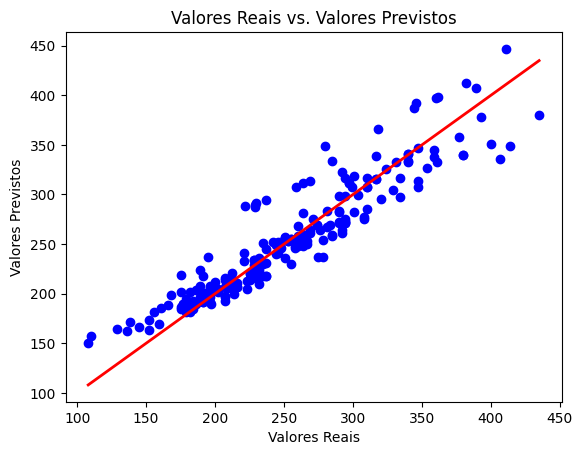

In [16]:
#Plotar os dados
plt.scatter(y_teste, y_pred, color='blue')
plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()